In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import quandl
%matplotlib inline

In [2]:
start = pd.to_datetime('2012-01-01')
end = pd.to_datetime('2017-01-01')

In [3]:
QUANDL_KEY = 'CtRZKjk326JnFLk695Yw'
quandl.ApiConfig.api_key = QUANDL_KEY

In [4]:
aapl = quandl.get('WIKI/AAPL.11',start_date=start,end_date=end)
cisco = quandl.get('WIKI/CSCO.11',start_date=start,end_date=end)
ibm = quandl.get('WIKI/IBM.11',start_date=start,end_date=end)
amzn = quandl.get('WIKI/AMZN.11',start_date=start,end_date=end)

In [5]:
aapl

,Adj. Close
Date,
2012-01-03,52.848787
2012-01-04,53.132802
2012-01-05,53.722681
2012-01-06,54.284287
2012-01-09,54.198183
...,...
2016-12-23,115.080808
2016-12-27,115.811668
2016-12-28,115.317843


In [6]:
stocks = pd.concat([aapl,cisco,ibm,amzn],axis=1)
stocks.columns = ['aapl','cisco','ibm','amzn']

In [7]:
stocks.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,52.848787,15.617341,157.578371,179.03
2012-01-04,53.132802,15.919125,156.935540,177.51
2012-01-05,53.722681,15.860445,156.191208,177.61
2012-01-06,54.284287,15.801764,154.398046,182.61
2012-01-09,54.198183,15.902359,153.594506,178.56


In [8]:
#Mean Daily Return 
mean_daily_ret = stocks.pct_change(1).mean()
mean_daily_ret


aapl     0.000750
cisco    0.000599
ibm      0.000081
amzn     0.001328
dtype: float64

In [9]:
#Correlation between Daily Percentage Change
stocks.pct_change(1).corr()

,aapl,cisco,ibm,amzn
aapl,1.000000,0.301990,0.297498,0.235487
cisco,0.301990,1.000000,0.424672,0.284470
ibm,0.297498,0.424672,1.000000,0.258492
amzn,0.235487,0.284470,0.258492,1.000000


<AxesSubplot:xlabel='Date'>

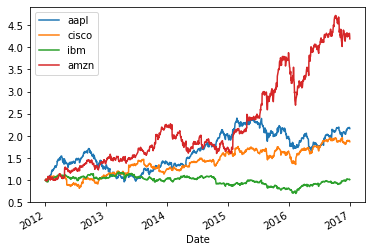

In [10]:
# Daily return graph 
stock_normed = stocks/stocks.iloc[0]
stock_normed.plot()
#iloc = when we want to take teh first element 

In [11]:
stock_daily_ret = stocks.pct_change(1)
stock_daily_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005374,0.019324,-0.004079,-0.008490
2012-01-05,0.011102,-0.003686,-0.004743,0.000563
2012-01-06,0.010454,-0.003700,-0.011481,0.028152
2012-01-09,-0.001586,0.006366,-0.005204,-0.022178


# LOG RETURNS vs ARITHEMTIC RETURNS

In [12]:
import numpy as np

In [13]:
log_ret = np.log(stocks.pct_change(1))
log_ret.head()

<ipython-input-13-e16e8d931cf6>:1: RuntimeWarning: divide by zero encountered in log
  log_ret = np.log(stocks.pct_change(1))
<ipython-input-13-e16e8d931cf6>:1: RuntimeWarning: invalid value encountered in log
  log_ret = np.log(stocks.pct_change(1))


,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,-5.226160,-3.946424,NaN,NaN
2012-01-05,-4.500632,NaN,NaN,-7.481612
2012-01-06,-4.560790,NaN,NaN,-3.570152
2012-01-09,NaN,-5.056776,NaN,NaN


In [14]:
# log return same like arithmetic return
log_ret = np.log(stocks/stocks.shift(1))
log_ret.head()

,aapl,cisco,ibm,amzn
Date,,,,
2012-01-03,NaN,NaN,NaN,NaN
2012-01-04,0.005360,0.019139,-0.004088,-0.008526
2012-01-05,0.011041,-0.003693,-0.004754,0.000563
2012-01-06,0.010400,-0.003707,-0.011547,0.027763
2012-01-09,-0.001587,0.006346,-0.005218,-0.022428


Stocks
Index(['aapl', 'cisco', 'ibm', 'amzn'], dtype='object')


Creating Random Weights
[0.51639863 0.57066759 0.02847423 0.17152166]




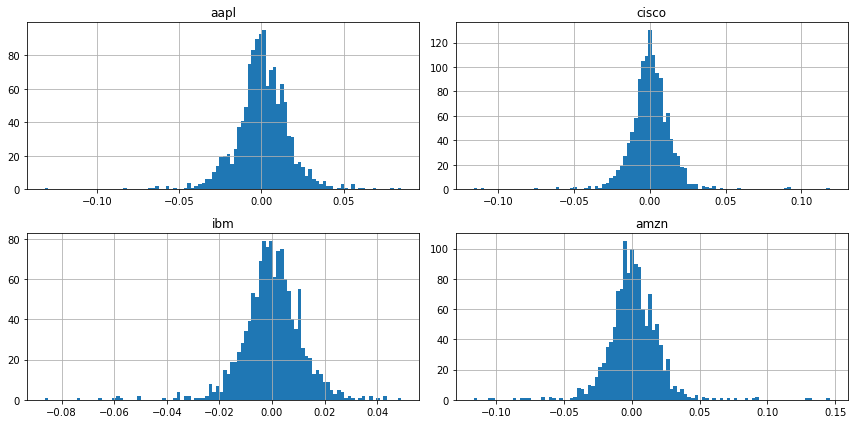

In [15]:

log_ret.hist(bins=100,figsize=(12,6));
plt.tight_layout()

# Mean of log return multiply by business days
log_ret.mean() * 252


# Compute pairwise covariance of columns
log_ret.cov()

log_ret.cov()*252 # multiply by business days

# Set seed (optional)
np.random.seed(101)

# Stock Columns
print('Stocks')
print(stocks.columns)
print('\n')

print('Creating Random Weights')
weights = np.array(np.random.random(4))
print(weights)
print('\n')

In [16]:

# Rebalance Weights
print('Rebalance to sum to 1.0')
weights = weights / np.sum(weights)
print(weights)
print('\n')



Rebalance to sum to 1.0
[0.40122278 0.44338777 0.02212343 0.13326603]




In [17]:
# Expected Return
print('Expected Portfolio Return')
exp_ret = np.sum(log_ret.mean() * weights) *252
print(exp_ret)
print('\n')



Expected Portfolio Return
0.15599272049632504




In [18]:
# Expected Variance
print('Expected Volatility')
exp_vol = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
print(exp_vol)
print('\n')



Expected Volatility
0.18502649565908943




In [19]:


SR = exp_ret/exp_vol
print('Sharpe Ratio')
print(SR)

Sharpe Ratio
0.843083148392655


In [20]:
num_ports = 5000
all_weights = np.zeros((num_ports,len(stocks.columns)))
ret_arr = np.zeros(num_ports)
vol_arr = np.zeros(num_ports)
sharpe_arr = np.zeros(num_ports)
for ind in range(num_ports):
# Create Random Weights
    weights = np.array(np.random.random(4))
    
# Rebalance Weights
    weights = weights / np.sum(weights)
    
# Save Weights
    all_weights[ind,:] = weights
    
# Expected Return
    ret_arr[ind] = np.sum((log_ret.mean() * weights) *252)
    
# Expected Variance
    vol_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_ret.cov() * 252, weights)))
    
# Sharpe Ratio
    sharpe_arr[ind] = ret_arr[ind]/vol_arr[ind]
    sharpe_arr

In [21]:
sharpe_arr

array([0.94849162, 0.75937015, 0.55434249, ..., 0.67073029, 0.9650824 ,
       0.74986958])

In [22]:
sharpe_arr.max()

1.0303260551271305

In [23]:
np.random.seed(101)

In [24]:
sharpe_arr.argmax()

1419

In [25]:
# The optimal allocations out of 5000 allocations.
all_weights[1420,:]

array([0.10102882, 0.27737956, 0.24016286, 0.38142876])

In [26]:
max_sr_ret = ret_arr[1420]  # sharpe ratio at the given index
max_sr_vol = vol_arr[1420]  # volatility at the given index

# Plotting the Data

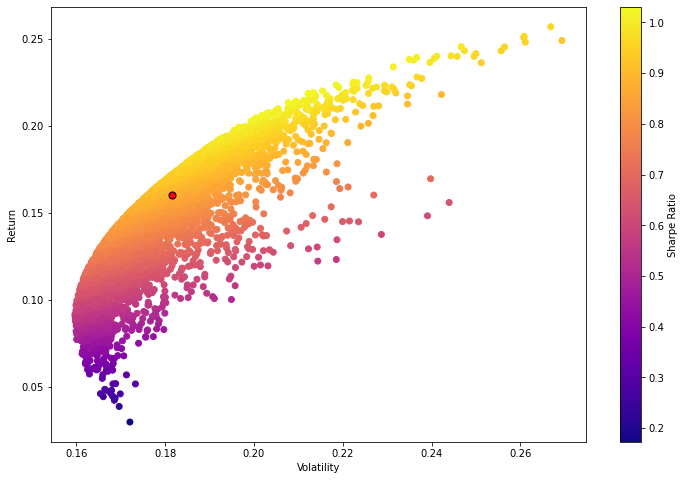

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(vol_arr,ret_arr,c=sharpe_arr,cmap='plasma')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')
# Add red dot for max SR
plt.scatter(max_sr_vol,max_sr_ret,c='red',s=50,edgecolors='black')